# Hepsi Emlak Regression Project

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

import warnings
warnings.filterwarnings('ignore')

In [213]:
df=pd.read_csv("Hepsi-Emlak-Datas.csv")
del df["Unnamed: 0"]

### EDA - Exploratory Data Analysis

In [214]:
df

,Advert_No,Price,Room_Count,Meter_Square,Build_Age,Town,Neighbourhood
0,135948-12,3600000,6,275.0,20,Meram,Havzan
1,129953-61,3360000,5,220.0,5,Selçuklu,Sancak
2,125942-75,1000000,2,100.0,0,Ereğli,Atakent
3,125942-72,1250000,3,130.0,25,Ereğli,Aydınlar
4,103426-78,3300000,5,230.0,0,Selçuklu,Selçuk
...,...,...,...,...,...,...,...
3481,121431-440,1700000,4,165.0,0,Karatay,Selimsultan
3482,121431-437,1180000,4,135.0,18,Selçuklu,Buhara
3483,121431-420,1750000,4,150.0,0,Selçuklu,SelahaddinEyyubi
3484,121431-419,2000000,4,150.0,0,Selçuklu,SelahaddinEyyubi


In [103]:
df.isnull().sum() #We examine the empty lines.

Advert_No        0
Price            0
Room_Count       0
Meter_Square     0
Build_Age        0
Town             0
Neighbourhood    0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Advert_No      3486 non-null   object
 1   Price          3486 non-null   int64 
 2   Room_Count     3486 non-null   int64 
 3   Meter_Square   3486 non-null   int32 
 4   Build_Age      3486 non-null   int64 
 5   Town           3486 non-null   object
 6   Neighbourhood  3486 non-null   object
dtypes: int32(1), int64(3), object(3)
memory usage: 177.1+ KB


In [215]:
df["Meter_Square"]=df["Meter_Square"].astype(int) #We change the Meter_Square value to integer.

### Data Visualization

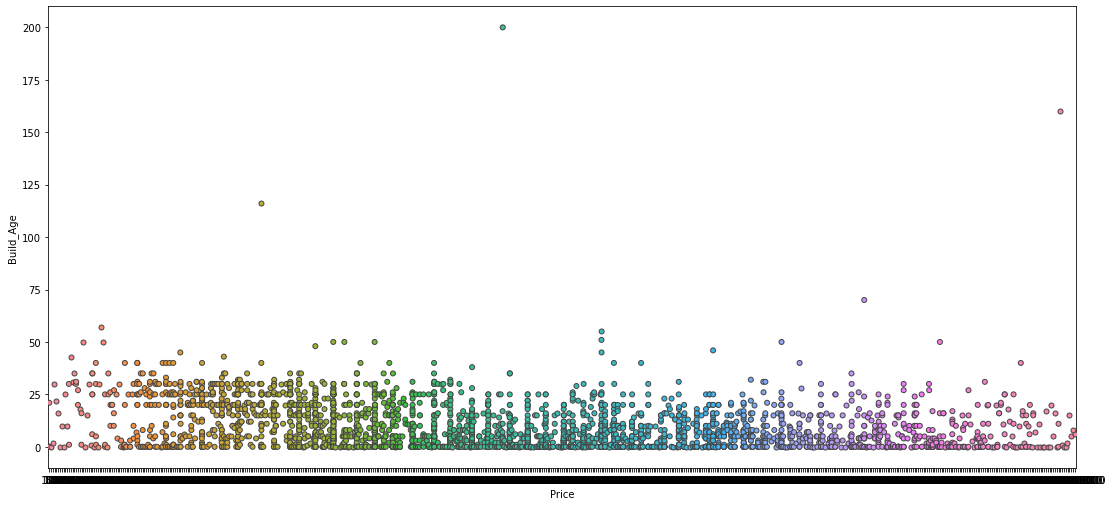

In [105]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="Price", y ="Build_Age", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("Build_Age")
plt.show()

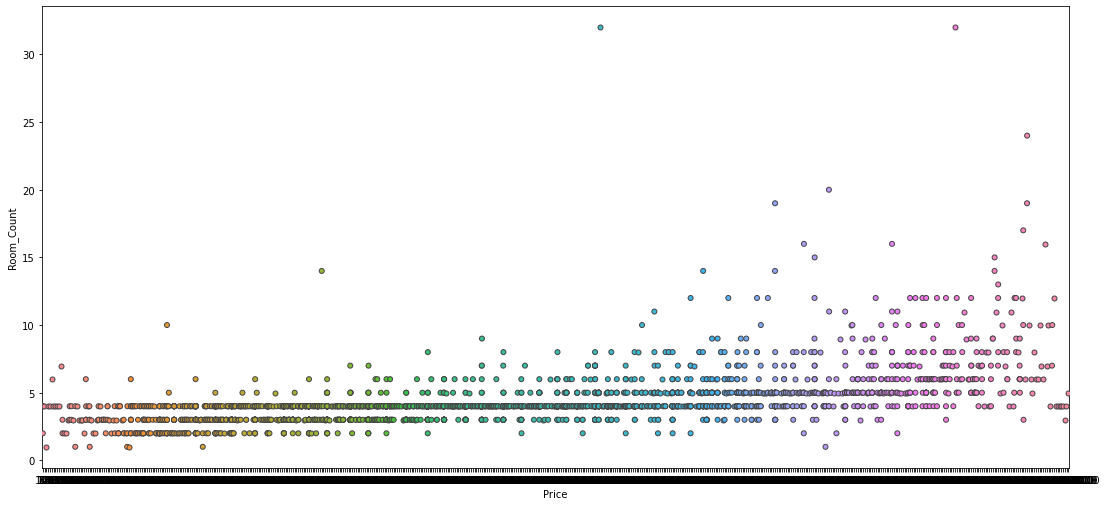

In [106]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="Price", y ="Room_Count", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("Room_Count")
plt.show()

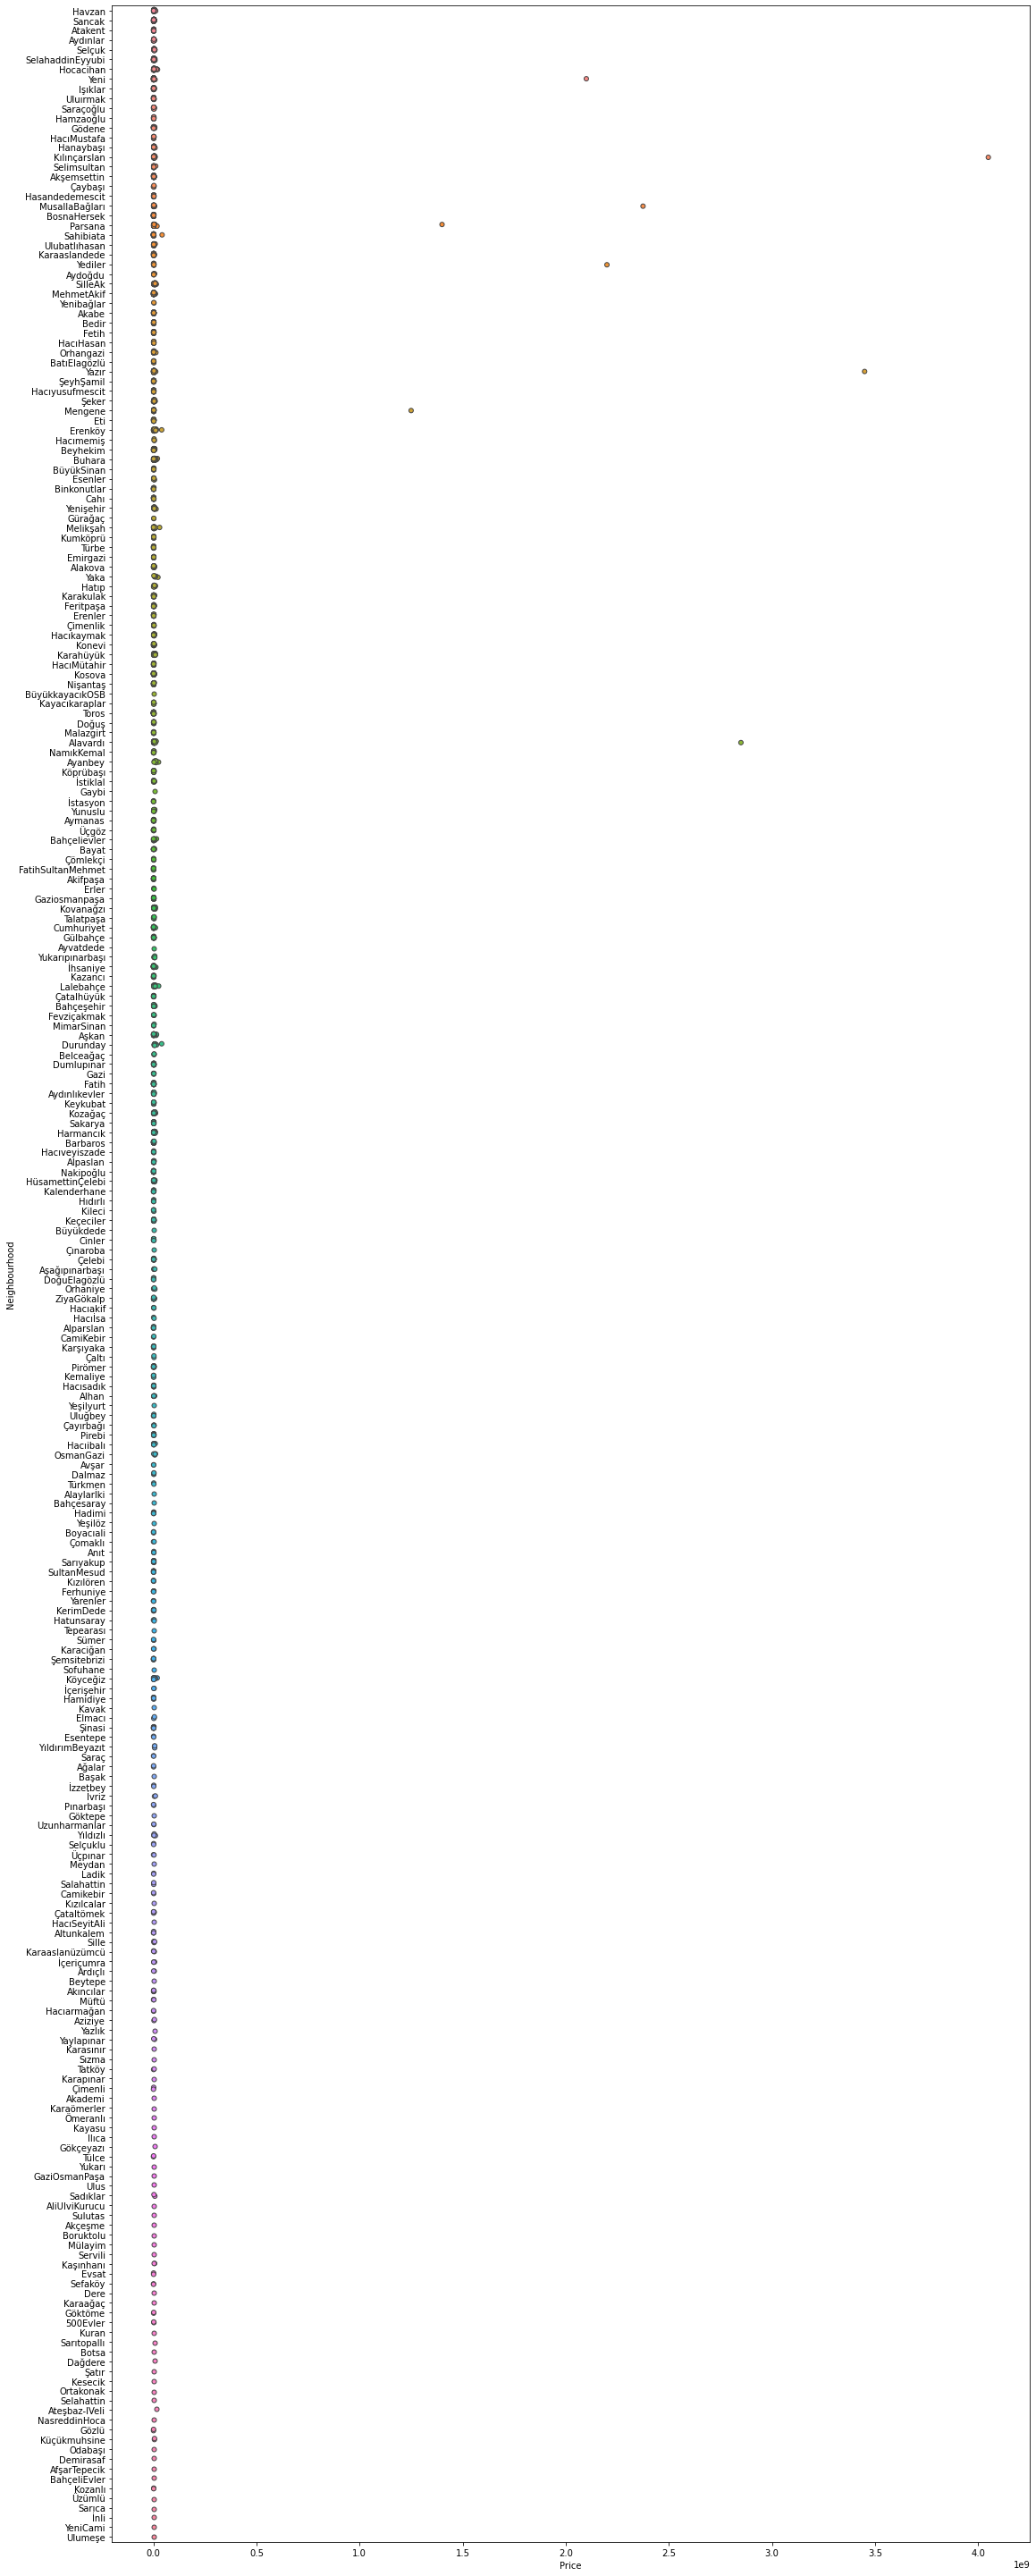

In [107]:
fig, ax = plt.subplots(figsize=[15,40])
plt.tight_layout() 
ax=sns.stripplot(x ="Price", y ="Neighbourhood", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("Neighbourhood")
plt.show()

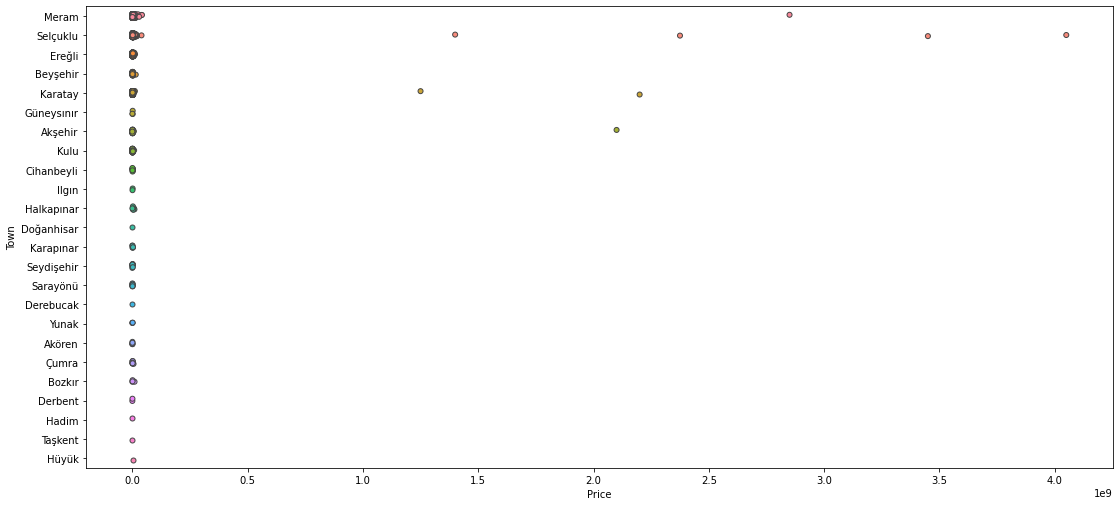

In [108]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="Price", y ="Town", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("Town")
plt.show()

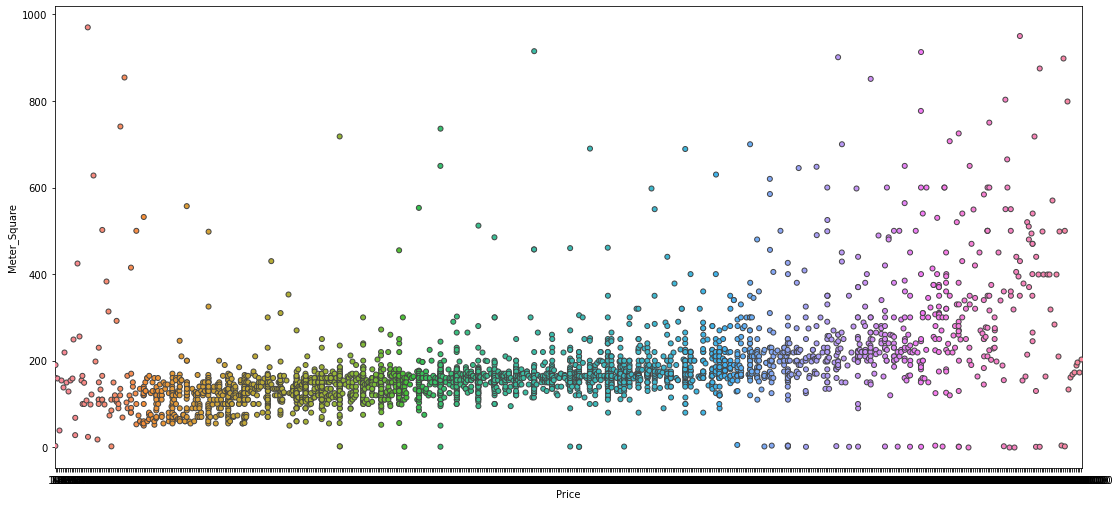

In [109]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="Price", y ="Meter_Square", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("Meter_Square")
plt.show()

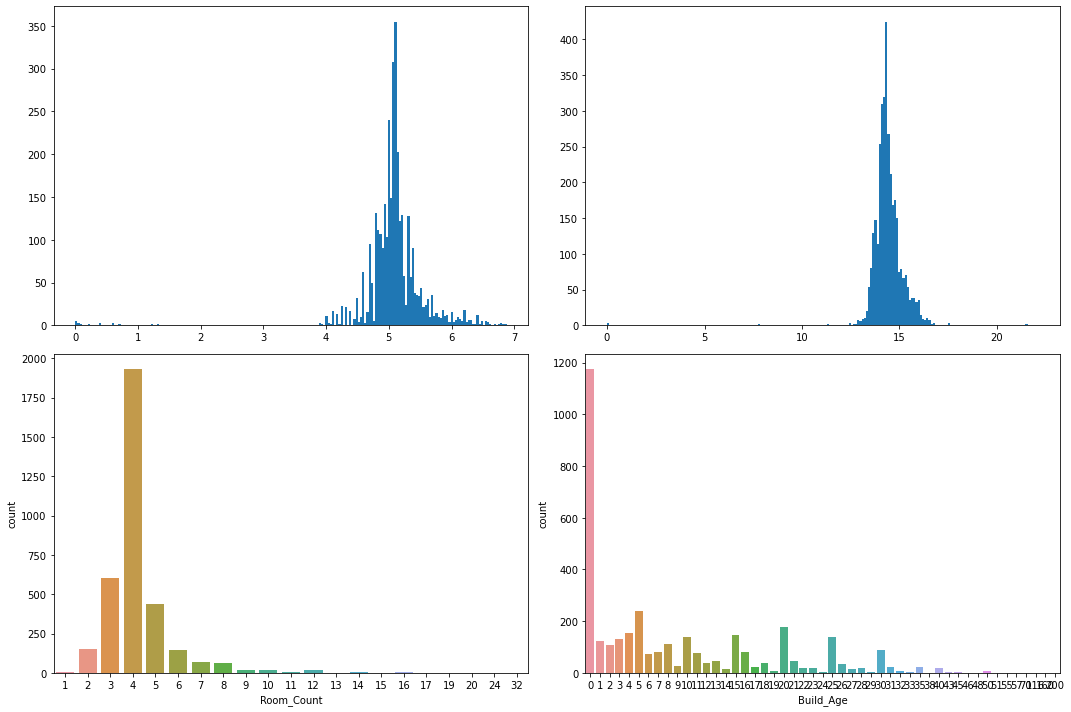

In [110]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(2,2,1)
plt.hist((np.log(df.Meter_Square)), bins=200);
fig.add_subplot(2,2,2)
plt.hist((np.log(df.Price)), bins=200);
fig.add_subplot(2,2,3)
sns.countplot(df['Room_Count'])
fig.add_subplot(2,2,4)
sns.countplot(df['Build_Age'])
plt.tight_layout()


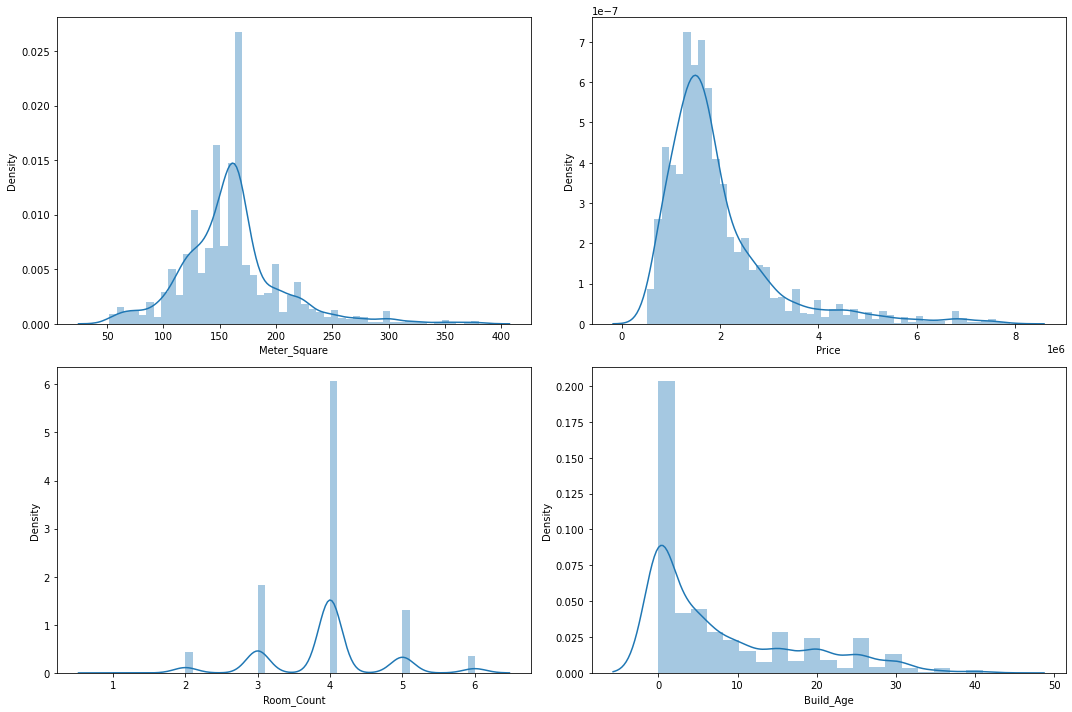

In [184]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(2,2,1)
sns.distplot(df['Meter_Square'])
fig.add_subplot(2,2,2)
sns.distplot(df['Price'])
fig.add_subplot(2,2,3)
sns.distplot(df['Room_Count'])
fig.add_subplot(2,2,4)
sns.distplot(df['Build_Age'])
plt.tight_layout()

### Feature Engineering

In [216]:
df=df[df['Room_Count']<7] #We delete values greater than 7 in Room_Count.
df=df[df['Build_Age']<45]
df=df[df['Meter_Square']<400]
df=df[df['Meter_Square']>50]
df=df[df['Price']>500000]
df=df[df['Price']<8000000]

### Regression

In [255]:
abs(df.corr()["Price"].sort_values(ascending=False)) #We look at their correlations.

Price           1.000000
Meter_Square    0.639045
Room_Count      0.547862
Build_Age       0.254128
Name: Price, dtype: float64

In [274]:
x,y=df.drop(["Advert_No","Price"],axis=1),df[["Price"]]
x=pd.get_dummies(x,drop_first=True)
x=scaler.fit_transform(x)
x.shape

(3090, 253)

In [275]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [276]:
model=Sequential()
model.add(Dense(260,activation="relu"))
model.add(Dense(240,activation="relu"))
model.add(Dense(220,activation="relu"))
model.add(Dense(190,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(120,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(65,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [277]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=200, verbose=1)
model.summary()

Epoch 1/200
20/20 [==============================] - 2s 13ms/step - loss: 5079252336640.0000 - val_loss: 5088483999744.0000
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 5014912237568.0000 - val_loss: 4500965294080.0000
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 2225713709056.0000 - val_loss: 1476122509312.0000
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 1096043462656.0000 - val_loss: 920571674624.0000
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 875930058752.0000 - val_loss: 777071820800.0000
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 766456823808.0000 - val_loss: 694330982400.0000
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 679095173120.0000 - val_loss: 623689334784.0000
Epoch 8/200
20/20 [==============================] - 0s 5ms/step - loss: 618295197696.0000 - val_loss: 604020146176.0000
Epoch 9/200
20/20 [=====

Epoch 135/200
20/20 [==============================] - 0s 5ms/step - loss: 318342955008.0000 - val_loss: 478491639808.0000
Epoch 136/200
20/20 [==============================] - 0s 5ms/step - loss: 318790598656.0000 - val_loss: 480729038848.0000
Epoch 137/200
20/20 [==============================] - 0s 5ms/step - loss: 328852045824.0000 - val_loss: 468819542016.0000
Epoch 138/200
20/20 [==============================] - 0s 5ms/step - loss: 312438915072.0000 - val_loss: 479277056000.0000
Epoch 139/200
20/20 [==============================] - 0s 5ms/step - loss: 314077970432.0000 - val_loss: 478811095040.0000
Epoch 140/200
20/20 [==============================] - 0s 5ms/step - loss: 327681277952.0000 - val_loss: 475701411840.0000
Epoch 141/200
20/20 [==============================] - 0s 5ms/step - loss: 310725148672.0000 - val_loss: 481510162432.0000
Epoch 142/200
20/20 [==============================] - 0s 5ms/step - loss: 303807922176.0000 - val_loss: 475554643968.0000
Epoch 143/200
20

 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 260)               66040     
                                                                 
 dense_224 (Dense)           (None, 240)               62640     
                                                                 
 dense_225 (Dense)           (None, 220)               53020     
                                                                 
 dense_226 (Dense)           (None, 190)               41990     
                                                                 
 dense_227 (Dense)           (None, 150)               28650     
                                                                 
 dense_228 (Dense)           (None, 120)               18120     
                                                                 
 dense_229 (Dense)           (None, 100)               12100     
                                                                 
 dense_230

In [278]:
tahmin=model.predict(x_test)

20/20 [==============================] - 0s 1ms/step


In [279]:
r2_score(tahmin,y_test)

0.5571985988523565

In [230]:
def algo_test(x,y):
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
    for algo in algos:
        algo.fit(x_train,y_train)    
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    return result.sort_values('R_Squared', ascending=False)

In [241]:
z=algo_test(x,y)
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,5.792642e-01,7.171359e+05,4.342980e+05
Gradient Boosting,5.733575e-01,7.221523e+05,4.506003e+05
Ridge,5.381834e-01,7.513314e+05,4.790934e+05
Lasso,5.107516e-01,7.733240e+05,4.882451e+05
Extra Tree,2.974574e-01,9.266871e+05,5.028387e+05
ElasticNet,1.034740e-01,1.046835e+06,7.228593e+05
Linear,-1.011725e+25,3.516641e+18,3.737679e+17


In [242]:
for i in range(7):
    print(z["R_Squared"][i])

0.579264213415573
0.5733724500859143
0.5381834003332523
0.5107515715061626
0.33303728041572955
0.1034740107575608
-1.0117254105913296e+25
